In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\raval\Downloads\set1.txt",sep=",")
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [3]:
df.drop("row.names",axis=1,inplace=True)

### 1

In [4]:
df.shape[0]

462

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


# 2

In [6]:
df.famhist.value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [7]:
df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [8]:
df.groupby(["chd","famhist"]).size()

chd  famhist
0    Absent     206
     Present     96
1    Absent      64
     Present     96
dtype: int64

<Axes: xlabel='chd,famhist'>

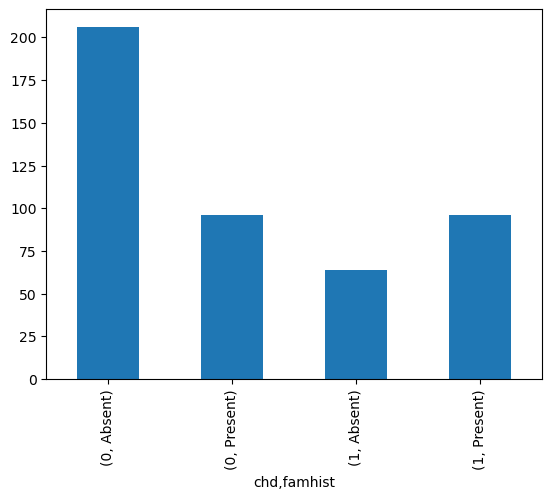

In [9]:
(df.groupby(["chd","famhist"]).size()).plot(kind="bar")

# 3

In [10]:
df[["sbp","age"]].corr()

,sbp,age
sbp,1.000000,0.388771
age,0.388771,1.000000


the correlation is positive 0.38 , so we can say they are not highly correlated.

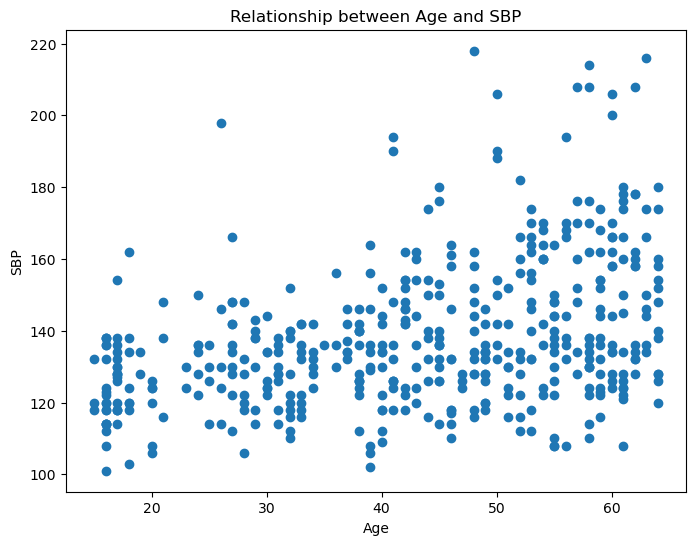

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df["age"],df["sbp"])
plt.xlabel("Age")
plt.ylabel("SBP")
plt.title("Relationship between Age and SBP")
plt.show()

# 4

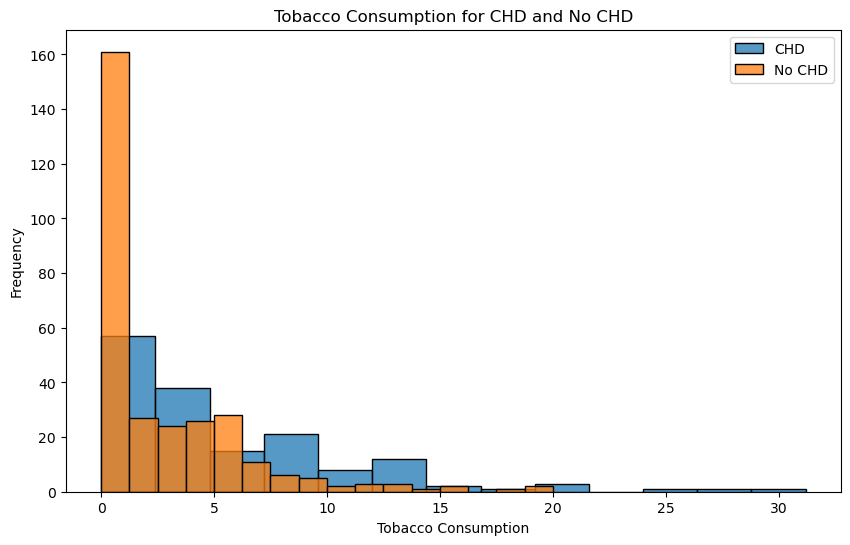

In [12]:
plt.figure(figsize=(10, 6))

sns.histplot(df[df['chd']==1]['tobacco'], label='CHD')
sns.histplot(df[df['chd']==0]['tobacco'], label='No CHD')
plt.xlabel("Tobacco Consumption")
plt.ylabel("Frequency")
plt.legend()
plt.title("Tobacco Consumption for CHD and No CHD")
plt.show()

individuals with CHD tend to have higher levels of tobacco consumption

# 5

In [13]:
df[['sbp', 'obesity', 'age', 'ldl']].corr()

,sbp,obesity,age,ldl
sbp,1.000000,0.238067,0.388771,0.158296
obesity,0.238067,1.000000,0.291777,0.330506
age,0.388771,0.291777,1.000000,0.311799
ldl,0.158296,0.330506,0.311799,1.000000


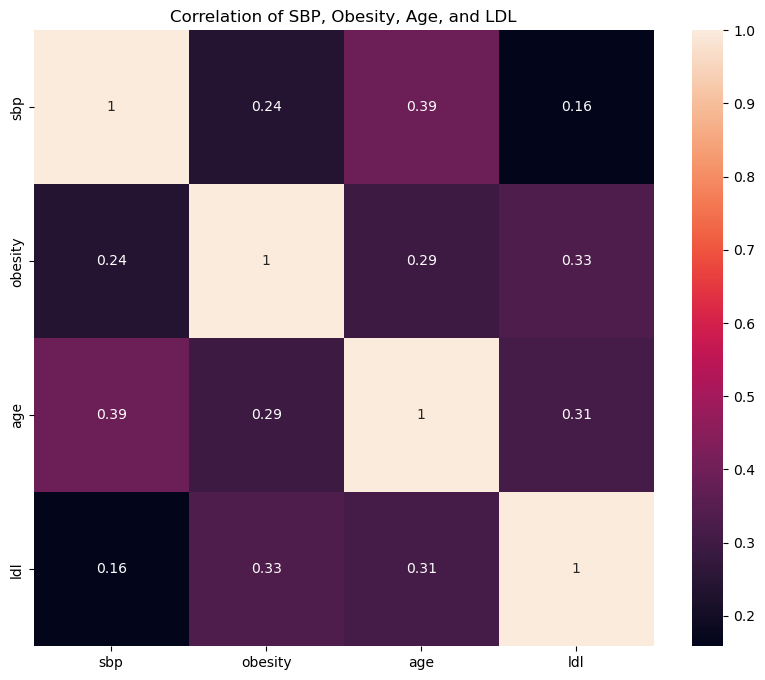

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['sbp', 'obesity', 'age', 'ldl']].corr(), annot=True)
plt.title("Correlation of SBP, Obesity, Age, and LDL")
plt.show()

# 6

In [15]:
df['age'].max()

64

In [16]:
pd.cut(df['age'], bins=[0, 15, 35, 55, 100], labels=['young', 'adults', 'mid', 'old'])

0      mid
1      old
2      mid
3      old
4      mid
      ... 
457    old
458    mid
459    mid
460    mid
461    mid
Name: age, Length: 462, dtype: category
Categories (4, object): ['young' < 'adults' < 'mid' < 'old']

In [17]:
df['agegroup'] = pd.cut(df['age'], bins=[0, 15, 35, 55, 100], labels=['young', 'adults', 'mid', 'old'])

In [18]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,mid


# 7

In [19]:
# df.groupby(["chd","agegroup"]).sum()

In [20]:
df.groupby(["chd","agegroup"]).size()

chd  agegroup
0    young         3
     adults      123
     mid         123
     old          53
1    young         0
     adults       18
     mid          81
     old          61
dtype: int64

# 8

<Axes: >

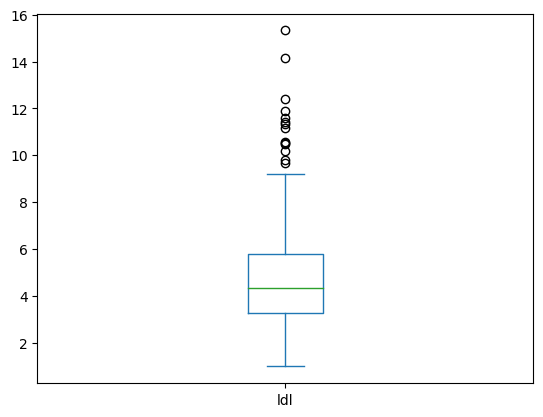

In [21]:
df.ldl.plot(kind="box")

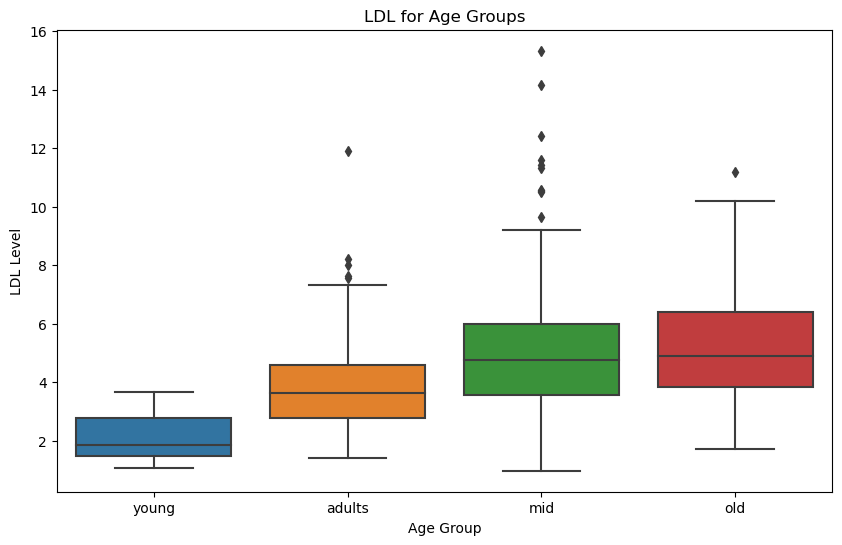

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='agegroup', y='ldl', data=df, order=['young', 'adults', 'mid', 'old'])
plt.xlabel("Age Group")
plt.ylabel("LDL Level")
plt.title("LDL for Age Groups")
plt.show()